<a href="https://colab.research.google.com/github/Orley74/ML_projects_python/blob/main/sterowanie_gestami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.9/337.9 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.5 MB/s eta 0:00:00
  Created wheel for labelme: filename=labelme-5.3.1-py3-none-any.whl size=1472256 sha256=c44ad2b2cd82b9b1825c6437abd1898f80a09047e13040220d29320b82ce9b8d
  Stored in directory: /root/.cache/pip/wheels/32/d6/4d/f22a84b8a82543c9db037748207ca29

In [ ]:
import os
import time
import uuid
import cv2

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
image_path = os.path.join('data','images')
number_images = 30

usuwanie folderu checkpoints


In [ ]:
folder_path = "data"

checkpoint_folder = os.path.join(folder_path, ".ipynb_checkpoints")

if os.path.exists(checkpoint_folder):
    os.system(f"rm -rf {checkpoint_folder}")  # Dla systemów Unix/Linux
    # os.system(f"rmdir /s {checkpoint_folder}")  # Dla systemu Windows
    print(".ipynb_checkpoints folder został usunięty.")
else:
    print("Brak folderu .ipynb_checkpoints.")


.ipynb_checkpoints folder został usunięty.


wlaczenie labelme

In [ ]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: /root/.labelmerc
QObject::moveToThread: Current thread (0x5a71f30375c0) is not the object's thread (0x5a71f4755500).
Cannot move to target thread (0x5a71f30375c0)

qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb, eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, wayland-egl, wayland, wayland-xcomposite-egl, wayland-xcomposite-glx, webgl.



In [ ]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')


[]

zaladowanie danych do Dataset images plikow .jpg

In [ ]:
images = tf.data.Dataset.list_files('data/images/*.jpg')


sprawdzenie czy pliki są w folderach


In [ ]:
for root, dirs, files in os.walk('data/labels',topdown = False):
  for name in files:
    print(name)

In [ ]:
len(images)

200

In [ ]:
images.as_numpy_iterator().next()


b'data/images/df231fe8-50ba-11ee-be5b-1068389f42d4.jpg'

In [ ]:
len(images)

200

In [ ]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
images = images.map(load_image)

In [ ]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [ ]:
images.as_numpy_iterator().next()

array([[[221, 245, 247],
        [225, 249, 251],
        [218, 242, 244],
        ...,
        [231, 255, 253],
        [230, 255, 252],
        [230, 255, 252]],

       [[220, 244, 246],
        [224, 248, 250],
        [217, 241, 243],
        ...,
        [231, 255, 253],
        [231, 255, 253],
        [231, 255, 253]],

       [[217, 241, 243],
        [220, 244, 246],
        [214, 240, 241],
        ...,
        [230, 255, 255],
        [230, 255, 255],
        [230, 255, 255]],

       ...,

       [[116, 110,  84],
        [116, 110,  86],
        [115, 108,  89],
        ...,
        [121, 120, 115],
        [124, 123, 118],
        [126, 125, 120]],

       [[112, 107,  78],
        [112, 107,  78],
        [112, 106,  82],
        ...,
        [120, 120, 112],
        [120, 121, 113],
        [123, 124, 116]],

       [[110, 105,  75],
        [111, 106,  77],
        [111, 105,  79],
        ...,
        [118, 118, 108],
        [118, 119, 111],
        [120, 121, 113]]

wyswietlenie zdjec


In [ ]:
image_generator = images.batch(4).as_numpy_iterator()


In [ ]:
plot_images = image_generator.next()


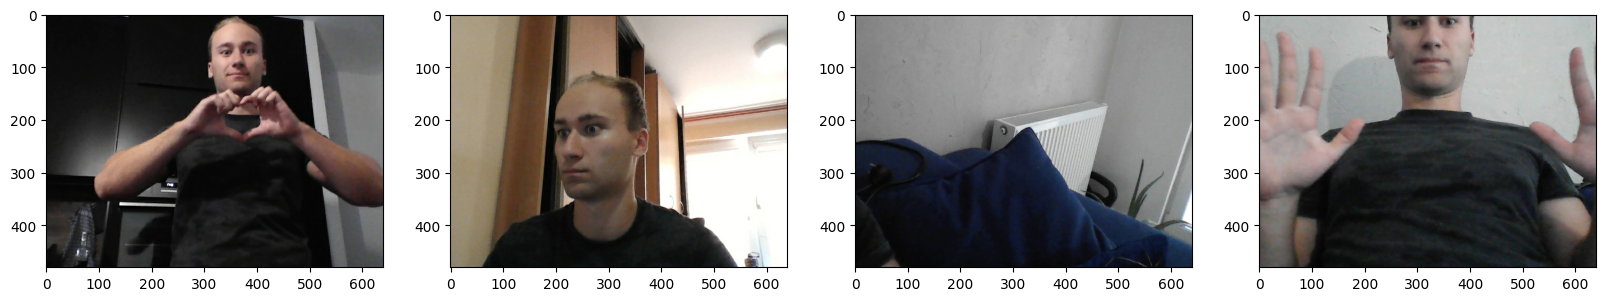

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [ ]:
200*0.7

140.0

In [ ]:
200*0.2

kopiowanie zdjec z odpowiadajacymi im json

In [ ]:
import os
import shutil

for folder in ['train','val', 'test']:
    for img in os.listdir(os.path.join('data',folder,'images')):

        imgName = img.split('.')[0]+'.json'
        jsonPath = os.path.join('data','labels',imgName)

        if os.path.exists(jsonPath):
            new_jsonpath = os.path.join('data',f"{folder}/labels",imgName)
            shutil.copy(jsonPath,new_jsonpath)

In [ ]:
import albumentations as alb

formatowanie zdjec w roznych ujeciach (zmiana koloru, obrocenie itp)

In [ ]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

PRZKOLADOWE ZDJECIE


otworzenie przykladowego zdjecia


In [ ]:
img = cv2.imread(os.path.join('data','train','images','83d87191-50ba-11ee-9409-1068389f42d4.jpg'))

In [ ]:
with open(os.path.join('data','train','labels','83d87191-50ba-11ee-9409-1068389f42d4.json'), 'r') as f:
    label = json.load(f)

koordynaty zaznaczonego miejsca

In [ ]:
label['shapes'][0]['points']

[[351.38888888888886, 160.27777777777777],
 [439.1666666666667, 243.05555555555554]]

In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

przygotowanie do formatu 'albumentations'

(x_min, y_min, x_max, y_max) -> (0-1)
np x_min = 10, width = 100 to wartosc po zastosowaniu funkcji bedzie wynosic 0.1



In [ ]:
coords = list(np.divide(coords, [640, 480, 640, 480]))

przygotowane dane do formatu(sa inne formaty w albumentation np yolo)

In [ ]:
coords

[0.5490451388888888,
 0.33391203703703703,
 0.6861979166666667,
 0.5063657407407407]

zastosowanie filtrow i zobaczenie rezultatow

In [ ]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])


In [ ]:
augmented['class_labels']

['face']

In [ ]:
augmented['bboxes']

[(0.2574074074074072,
  0.3028395061728395,
  0.45246913580246917,
  0.48679012345679007)]

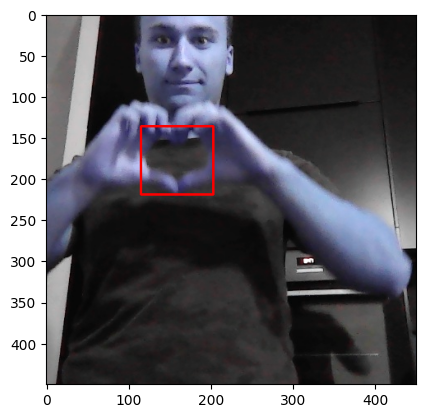

In [ ]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
                    (255,0,0), 2)

plt.imshow(augmented['image'])

zastosowanie tego wyzej do kazdego zdjecia. Zrobienie z 1 (60) zdjęć  z zastosowaniem filtrów


In [ ]:

for partition in ['train','test','val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

dodanie zdjec do datasetu, uzycie funkcji dla kazdego zdjecia: load image (definiowana wyzej), zmiany wielkosci (120x120) i zmiana skalowania RGB (0,255) -> (0-1)


In [ ]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [ ]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [ ]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [ ]:
train_images.as_numpy_iterator().next()


array([[[0.00784314, 0.02745098, 0.01176471],
        [0.01832108, 0.02616422, 0.01439951],
        [0.01960784, 0.01960784, 0.01176471],
        ...,
        [0.01930147, 0.02714461, 0.02322304],
        [0.01421569, 0.02205882, 0.01813726],
        [0.00925245, 0.02199755, 0.01807598]],

       [[0.00784314, 0.02745098, 0.01176471],
        [0.01568628, 0.02352941, 0.01176471],
        [0.01568628, 0.02352941, 0.01176471],
        ...,
        [0.0221201 , 0.02310049, 0.02261029],
        [0.0161152 , 0.01709559, 0.01660539],
        [0.00833333, 0.02107843, 0.01715686]],

       [[0.00735294, 0.02696078, 0.01127451],
        [0.01568628, 0.02352941, 0.01176471],
        [0.01568628, 0.02352941, 0.01176471],
        ...,
        [0.01868873, 0.02653186, 0.02261029],
        [0.01954657, 0.02738971, 0.02346814],
        [0.01243873, 0.02518382, 0.02126225]],

       ...,

       [[0.06403186, 0.07794118, 0.        ],
        [0.07254902, 0.08339461, 0.01954657],
        [0.04264706, 0

tak jak dla zdjec definiowanie funkcji pobierajacej ramki



In [ ]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

zbieranie ramek

In [ ]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
train_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

sprawdzenie wielkosci zbiorow i podzielenie danych


In [ ]:
len(train_images), len(train_labels), len(val_images), len(val_labels), len(test_images), len(test_labels)


(8400, 8400, 2400, 2400, 1200, 1200)

polaczenie zbiorow danych

In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))

In [ ]:
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [ ]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()[1]

(array([[0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1]], dtype=uint8),
 array([[0.    , 0.    , 0.    , 0.    ],
        [0.588 , 0.029 , 0.593 , 0.3599],
        [0.    , 0.    , 0.    , 0.    ],
        [0.1218, 0.551 , 0.4316, 0.7954],
        [0.3325, 0.3184, 0.5425, 0.531 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.7236, 0.5986, 0.899 , 0.7515],
        [0.336 , 0.527 , 0.6646, 0.773 ]], dtype=float16))

sprawdzenie polaczenia

In [ ]:
data_samples = train.as_numpy_iterator()

In [ ]:
res = data_samples.next()

 cv2.rectangle - najpierw zmienna przechowujaca zdjecie, potem podaje kordy (x_min * 120,y_min * 120) i to samo z max, potem konwertuje to na int bo tak chce cv2, dodaje tez kolor (255,0,0) w RBG i 2 czyli grubosc w px

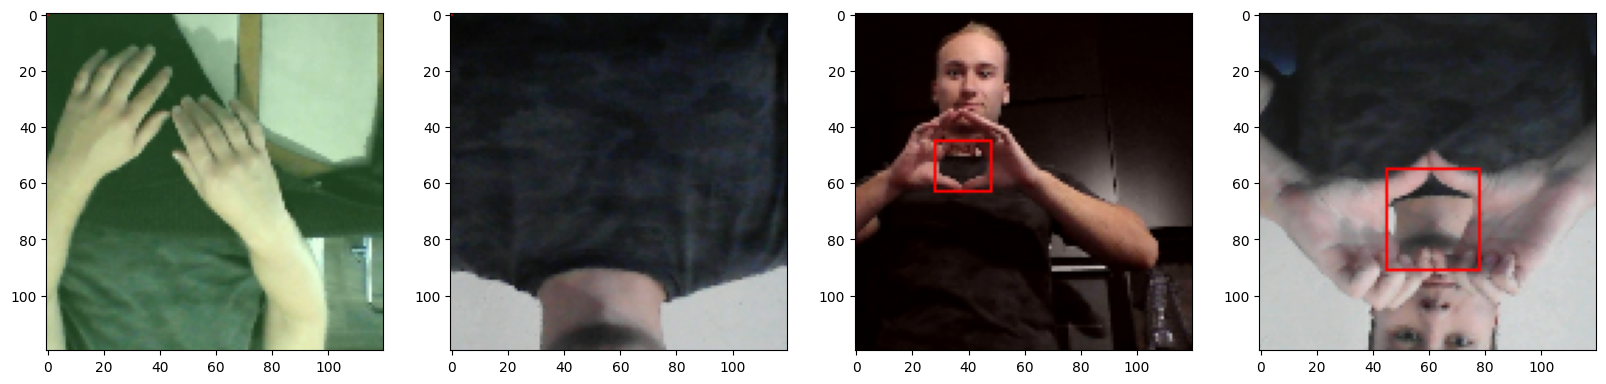

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                        (255,0,0), 1)

    ax[idx].imshow(sample_image)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

pobranie modelu VGG16 z tf keras api

In [ ]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


layers zawarte w modelu

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

buduje wlasny model zawierajacy model vgg16

In [ ]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [ ]:
facetracker = build_model()

podsumowanie calego modelu

In [ ]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [ ]:
X, y = train.as_numpy_iterator().next()

In [ ]:
X.shape

(8, 120, 120, 3)

sprawdzenie dzialania

In [ ]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 3s 3s/step


In [ ]:

classes, coords

(array([[0.49679658],
        [0.5455856 ],
        [0.4613573 ],
        [0.5738816 ],
        [0.57985145],
        [0.5515937 ],
        [0.5832812 ],
        [0.5071247 ]], dtype=float32),
 array([[0.36413762, 0.26992986, 0.4349195 , 0.5770594 ],
        [0.38478595, 0.2738947 , 0.3611341 , 0.5964313 ],
        [0.4295286 , 0.33210894, 0.33765188, 0.5800491 ],
        [0.46227157, 0.28294736, 0.48585635, 0.5222148 ],
        [0.49562338, 0.35685572, 0.41272306, 0.5973227 ],
        [0.4138705 , 0.2254117 , 0.4367646 , 0.50416565],
        [0.34056655, 0.2631815 , 0.2803859 , 0.46834156],
        [0.43183553, 0.2646199 , 0.46279618, 0.62720704]], dtype=float32))

In [ ]:
len(train)

In [ ]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)


In [ ]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [ ]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=1.8285813>

In [ ]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7100078>

In [ ]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=1.8285813>

In [ ]:
class FaceTracker(Model):
    def __init__(self, eyetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+0.5*batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [ ]:
model = FaceTracker(facetracker)

In [ ]:
model.compile(opt, classloss, regressloss)

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
 247/1050 [======>.......................] - ETA: 1:01:24 - total_loss: 1.5113 - class_loss: 0.7137 - regress_loss: 1.1544

KeyboardInterrupt: ignored